<a href="https://colab.research.google.com/github/uditi13/TSF-TASKS/blob/main/Task1(GRIP).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Linear Regression Task**

In this task, we have to predict the percentage of marks that a student is expected to score based upon the number of hours they studied.

**Importing the required Libraries**

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**Importing the Data**

In [32]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
data.head(20)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [34]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


**Plotting the distribution of scores**

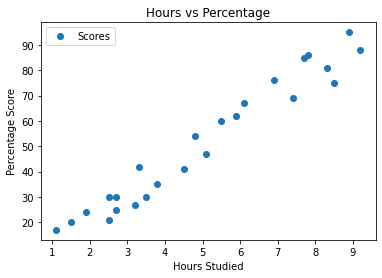

Positive Linear Relation is observed


In [35]:
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()
print('Positive Linear Relation is observed')

In [36]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


**Preparing the data**

In [37]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

**Splitting this Data into training and test sets**

In [38]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0)

**Training the Model**

In [39]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Training the Algorithm**

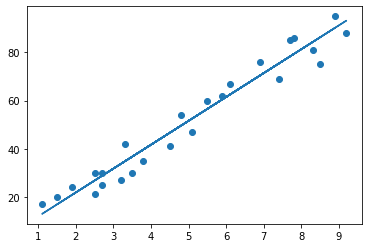

In [40]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

**Checking accuracy scores for training and test sets**

In [41]:
print('Test Score')
print(regressor.score(X_test, y_test))
print('Training Score')
print(regressor.score(X_train, y_train))

Test Score
0.9454906892105354
Training Score
0.9515510725211553


**Making Predictions**

In [42]:
# Testing data - in hours
print(X_test)
# Predicting the scores
y_pred = regressor.predict(X_test) 

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [43]:
# Comparing Actual vs Predicted
data1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
data1

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


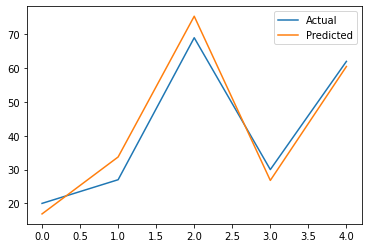

In [44]:
data1.plot()

**Evaluating the Model**

In [49]:
# Importing metrics from sklearn 
from sklearn.metrics import mean_squared_error,mean_absolute_error

# To find Mean Absolute Error
mae = (mean_absolute_error(y_test, y_pred))
print("Mean Absolute Error:",mae)

# To find Root Mean Squared Error
mse = (mean_squared_error(y_test, y_pred))
print("Mean Squared Error:",mse)

Mean Absolute Error: 4.183859899002982
Mean Squared Error: 21.598769307217456
